# Workshop 1: Sturdy-Octo-Disco-Adding-Sunglasses-for-a-Cool-New-Look

## NAME: PRIYADHARSHINI P

## REGISTER NUMBER: 212223240128

Text(0.5, 1.0, 'Face')

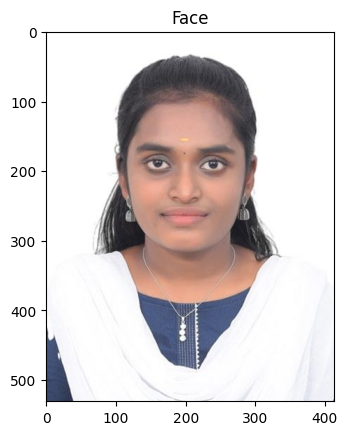

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
faceImage = cv2.imread('my.jpg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load image with unchanged flag
glassPNG = cv2.imread(r"sunglass.png", cv2.IMREAD_UNCHANGED)

print("Image shape:", glassPNG.shape)

if glassPNG.shape[2] == 4:
    # If PNG has alpha channel
    glassBGR = glassPNG[:, :, :3]   # BGR
    glassMask1 = glassPNG[:, :, 3]  # Alpha channel
else:
    # If PNG has no alpha channel
    glassBGR = glassPNG
    # Create a dummy mask (all opaque)
    glassMask1 = 255 * np.ones(glassPNG.shape[:2], dtype=np.uint8)


Image shape: (278, 370, 3)


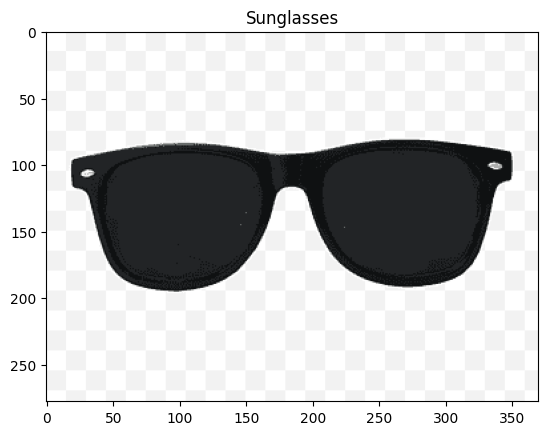

Text(0.5, 1.0, 'Sunglass Mask (generated)')

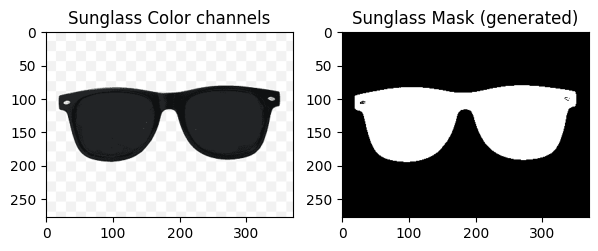

In [13]:
# Show image
plt.imshow(cv2.cvtColor(glassBGR, cv2.COLOR_BGR2RGB))
plt.title("Sunglasses")
plt.show()


plt.figure(figsize=[7,7])

# Show sunglasses color channels
plt.subplot(121)
plt.imshow(glassBGR[:,:,::-1])  # BGR → RGB
plt.title('Sunglass Color channels')

# Create grayscale and threshold to make mask
glassGray = cv2.cvtColor(glassBGR, cv2.COLOR_BGR2GRAY)
_, glassMask1 = cv2.threshold(glassGray, 240, 255, cv2.THRESH_BINARY_INV)  # detect non-white

# Show generated mask
plt.subplot(122)
plt.imshow(glassMask1, cmap='gray')
plt.title('Sunglass Mask (generated)')


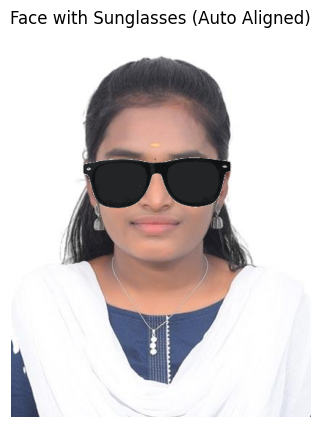

In [10]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Load images
faceImage = cv2.imread("my.jpg")
glassPNG = cv2.imread("sunglass.png", cv2.IMREAD_UNCHANGED)


# --- Step 1: Detect face landmarks ---
mp_face = mp.solutions.face_mesh
face_mesh = mp_face.FaceMesh(static_image_mode=True, max_num_faces=1)

rgb_img = cv2.cvtColor(faceImage, cv2.COLOR_BGR2RGB)
results = face_mesh.process(rgb_img)

h, w, _ = faceImage.shape

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Get left & right eye corner points (approx landmarks)
        left_eye = face_landmarks.landmark[33]   # left eye outer
        right_eye = face_landmarks.landmark[263] # right eye outer

        # Convert to pixel coordinates
        x1, y1 = int(left_eye.x * w), int(left_eye.y * h)
        x2, y2 = int(right_eye.x * w), int(right_eye.y * h)

        # Compute sunglasses width based on eye distance
        eye_width = x2 - x1
        new_w = int(eye_width * 2.0)   # make glasses wider than eyes
        new_h = int(new_w * glassPNG.shape[0] / glassPNG.shape[1])

        # Resize sunglasses
        glass_resized = cv2.resize(glassPNG, (new_w, new_h))

        # Create mask
        glass_gray = cv2.cvtColor(glass_resized, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(glass_gray, 240, 255, cv2.THRESH_BINARY_INV)
        mask_inv = cv2.bitwise_not(mask)

        # Position (centered around eyes)
        x = x1 - int(new_w * 0.25)
        y = y1 - int(new_h * 0.4)

        # ROI on face
        roi = faceImage[y:y+new_h, x:x+new_w]

        # Blend sunglasses with ROI
        bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
        fg = cv2.bitwise_and(glass_resized, glass_resized, mask=mask)
        combined = cv2.add(bg, fg)

        faceImage[y:y+new_h, x:x+new_w] = combined

# Show result
plt.figure(figsize=[5,5])
plt.imshow(cv2.cvtColor(faceImage, cv2.COLOR_BGR2RGB))
plt.title("Face with Sunglasses (Auto Aligned)")
plt.axis("off")
plt.show()